In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
METADATA_PATH = "../Core data/somalogic_metadata.csv"
PROTEINS_PATH = "../Core data/proteins_plot.csv"
metadata = pd.read_csv(METADATA_PATH)
proteins = pd.read_csv(PROTEINS_PATH)
valid_columns = {
        "TargetFullName": "TargetFullName",
        "Target": "Target",
        "EntrezGeneID": "EntrezGeneID",
        "EntrezGeneSymbol": "EntrezGeneSymbol"
    }
metadata.head()


,ExtIdentifier,SubjectID,age,gender,combined,ANA,Centromere,SCL_70,RNA_Polymerase_3,Lung_Fibrosis_binary,Lung_Fibrosis,Total_mRss,Immunosupression_bin,Immunosupression,overall,category,condition,low_ssc,Disease_duration,Local_skin_score
0,EXID40000009256847,COO-363,50,Female,50_F,1,0,1,0,0,No,0,No,0,Scleroderma,VEDOSS,VEDOSS,no,0,0
1,EXID40000009257105,PDAR-0335,42,Female,42_F,0,0,0,0,0,No,0,No,0,Healthy,Healthy,Healthy,no,0,0
2,EXID40000009257119,COO-005,51,Male,51_M,1,0,0,0,1,Yes,2,Yes,1,Scleroderma,Scleroderma,SSC_low,low,156,0
3,EXID40000009257121,COO-429,70,Female,70_F,1,0,0,1,1,Yes,33,No,0,Scleroderma,Scleroderma,SSC_high,no,0,2
4,EXID40000009257122,COO-425,78,Female,78_F,1,0,1,0,1,Yes,18,Yes,1,Scleroderma,Scleroderma,SSC_low,low,60,1


In [66]:
proteins

,Unnamed: 0,SeqId,PlateId,PlateRunDate,ScannerID,PlatePosition,SlideId,Subarray,SampleId,SampleType,...,TargetFullName,Target,UniProt,EntrezGeneID,EntrezGeneSymbol,Organism,Units,Type,Dilution,PlateScale_Reference
0,1,10000-28,PLT24684,2023-08-13,"SG16064525, SG17164580",C8,258633888845,3,COO-363,Sample,...,Beta-crystallin B2,CRBB2,P43320,1415,CRYBB2,Human,RFU,Protein,2.5,292.15
1,2,10000-28,PLT24684,2023-08-13,"SG16064525, SG17164580",C9,258633888846,3,PDAR-0335,Sample,...,Beta-crystallin B2,CRBB2,P43320,1415,CRYBB2,Human,RFU,Protein,2.5,292.15
2,3,10000-28,PLT24684,2023-08-13,"SG16064525, SG17164580",E8,258633888845,5,COO-005,Sample,...,Beta-crystallin B2,CRBB2,P43320,1415,CRYBB2,Human,RFU,Protein,2.5,292.15
3,4,10000-28,PLT24684,2023-08-13,"SG16064525, SG17164580",F8,258633888845,6,COO-429,Sample,...,Beta-crystallin B2,CRBB2,P43320,1415,CRYBB2,Human,RFU,Protein,2.5,292.15
4,5,10000-28,PLT24684,2023-08-13,"SG16064525, SG17164580",F7,258633888844,6,COO-425,Sample,...,Beta-crystallin B2,CRBB2,P43320,1415,CRYBB2,Human,RFU,Protein,2.5,292.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94752,94753,9999-1,PLT24684,2023-08-13,"SG16064525, SG17164580",A9,258633888846,1,COO-428,Sample,...,Interferon regulatory factor 6,IRF6,O14896,3664,IRF6,Human,RFU,Protein,2.5,409.75
94753,94754,9999-1,PLT24684,2023-08-13,"SG16064525, SG17164580",D8,258633888845,4,COO-403,Sample,...,Interferon regulatory factor 6,IRF6,O14896,3664,IRF6,Human,RFU,Protein,2.5,409.75
94754,94755,9999-1,PLT24684,2023-08-13,"SG16064525, SG17164580",D9,258633888846,4,PDAR-0343,Sample,...,Interferon regulatory factor 6,IRF6,O14896,3664,IRF6,Human,RFU,Protein,2.5,409.75
94755,94756,9999-1,PLT24684,2023-08-13,"SG16064525, SG17164580",G9,258633888846,7,COO-180,Sample,...,Interferon regulatory factor 6,IRF6,O14896,3664,IRF6,Human,RFU,Protein,2.5,409.75


In [68]:
id_type = "TargetFullName"
column_name = valid_columns[id_type]
print(column_name)
protein_id = "Interferon regulatory factor 6"
filtered_data = proteins[proteins[column_name] == protein_id]
print(f"Filtered Data for {protein_id}:")
filtered_data.head()

TargetFullName
Filtered Data for Interferon regulatory factor 6:


,Unnamed: 0,SeqId,PlateId,PlateRunDate,ScannerID,PlatePosition,SlideId,Subarray,SampleId,SampleType,...,TargetFullName,Target,UniProt,EntrezGeneID,EntrezGeneSymbol,Organism,Units,Type,Dilution,PlateScale_Reference
94744,94745,9999-1,PLT24684,2023-08-13,"SG16064525, SG17164580",C8,258633888845,3,COO-363,Sample,...,Interferon regulatory factor 6,IRF6,O14896,3664,IRF6,Human,RFU,Protein,2.5,409.75
94745,94746,9999-1,PLT24684,2023-08-13,"SG16064525, SG17164580",C9,258633888846,3,PDAR-0335,Sample,...,Interferon regulatory factor 6,IRF6,O14896,3664,IRF6,Human,RFU,Protein,2.5,409.75
94746,94747,9999-1,PLT24684,2023-08-13,"SG16064525, SG17164580",E8,258633888845,5,COO-005,Sample,...,Interferon regulatory factor 6,IRF6,O14896,3664,IRF6,Human,RFU,Protein,2.5,409.75
94747,94748,9999-1,PLT24684,2023-08-13,"SG16064525, SG17164580",F8,258633888845,6,COO-429,Sample,...,Interferon regulatory factor 6,IRF6,O14896,3664,IRF6,Human,RFU,Protein,2.5,409.75
94748,94749,9999-1,PLT24684,2023-08-13,"SG16064525, SG17164580",F7,258633888844,6,COO-425,Sample,...,Interferon regulatory factor 6,IRF6,O14896,3664,IRF6,Human,RFU,Protein,2.5,409.75


In [69]:
sample_ids = filtered_data["SampleId"].unique()
metadata_info = metadata[metadata["SubjectID"].isin(sample_ids)]
metadata_info.head()

,ExtIdentifier,SubjectID,age,gender,combined,ANA,Centromere,SCL_70,RNA_Polymerase_3,Lung_Fibrosis_binary,Lung_Fibrosis,Total_mRss,Immunosupression_bin,Immunosupression,overall,category,condition,low_ssc,Disease_duration,Local_skin_score
0,EXID40000009256847,COO-363,50,Female,50_F,1,0,1,0,0,No,0,No,0,Scleroderma,VEDOSS,VEDOSS,no,0,0
1,EXID40000009257105,PDAR-0335,42,Female,42_F,0,0,0,0,0,No,0,No,0,Healthy,Healthy,Healthy,no,0,0
2,EXID40000009257119,COO-005,51,Male,51_M,1,0,0,0,1,Yes,2,Yes,1,Scleroderma,Scleroderma,SSC_low,low,156,0
3,EXID40000009257121,COO-429,70,Female,70_F,1,0,0,1,1,Yes,33,No,0,Scleroderma,Scleroderma,SSC_high,no,0,2
4,EXID40000009257122,COO-425,78,Female,78_F,1,0,1,0,1,Yes,18,Yes,1,Scleroderma,Scleroderma,SSC_low,low,60,1


In [70]:
merged_data = pd.merge(
    filtered_data,
    metadata_info,
    left_on="SampleId",
    right_on="SubjectID",
    how="inner"
    )
merged_data.head()

,Unnamed: 0,SeqId,PlateId,PlateRunDate,ScannerID,PlatePosition,SlideId,Subarray,SampleId,SampleType,...,Lung_Fibrosis_y,Total_mRss,Immunosupression_bin_y,Immunosupression,overall,category,condition,low_ssc,Disease_duration_y,Local_skin_score_y
0,94745,9999-1,PLT24684,2023-08-13,"SG16064525, SG17164580",C8,258633888845,3,COO-363,Sample,...,No,0,No,0,Scleroderma,VEDOSS,VEDOSS,no,0,0
1,94746,9999-1,PLT24684,2023-08-13,"SG16064525, SG17164580",C9,258633888846,3,PDAR-0335,Sample,...,No,0,No,0,Healthy,Healthy,Healthy,no,0,0
2,94747,9999-1,PLT24684,2023-08-13,"SG16064525, SG17164580",E8,258633888845,5,COO-005,Sample,...,Yes,2,Yes,1,Scleroderma,Scleroderma,SSC_low,low,156,0
3,94748,9999-1,PLT24684,2023-08-13,"SG16064525, SG17164580",F8,258633888845,6,COO-429,Sample,...,Yes,33,No,0,Scleroderma,Scleroderma,SSC_high,no,0,2
4,94749,9999-1,PLT24684,2023-08-13,"SG16064525, SG17164580",F7,258633888844,6,COO-425,Sample,...,Yes,18,Yes,1,Scleroderma,Scleroderma,SSC_low,low,60,1


In [71]:

custom_palette = {
        "Healthy": "green",
        "VEDOSS": "violet",
        "SSC_low": "cyan",
        "SSC_high": "red"
        }
intensity.head()

0    402.5
1    276.0
2    272.3
3    317.7
4    277.5
Name: Intensity, dtype: float64

In [72]:
data_healthy = merged_data[merged_data['condition']== "Healthy"]
data_VEDOSS =merged_data[merged_data['condition']==  "VEDOSS"]
data_SSClow = merged_data[merged_data['condition']== "SSC_low"]
data_SSChigh = merged_data[merged_data['condition']== "SSC_high"]
data_healthy.head()

,Unnamed: 0,SeqId,PlateId,PlateRunDate,ScannerID,PlatePosition,SlideId,Subarray,SampleId,SampleType,...,Lung_Fibrosis_y,Total_mRss,Immunosupression_bin_y,Immunosupression,overall,category,condition,low_ssc,Disease_duration_y,Local_skin_score_y
1,94746,9999-1,PLT24684,2023-08-13,"SG16064525, SG17164580",C9,258633888846,3,PDAR-0335,Sample,...,No,0,No,0,Healthy,Healthy,Healthy,no,0,0
10,94755,9999-1,PLT24684,2023-08-13,"SG16064525, SG17164580",D9,258633888846,4,PDAR-0343,Sample,...,No,0,No,0,Healthy,Healthy,Healthy,no,0,0
12,94757,9999-1,PLT24684,2023-08-13,"SG16064525, SG17164580",E7,258633888844,5,PDAR-0344,Sample,...,No,0,No,0,Healthy,Healthy,Healthy,no,0,0


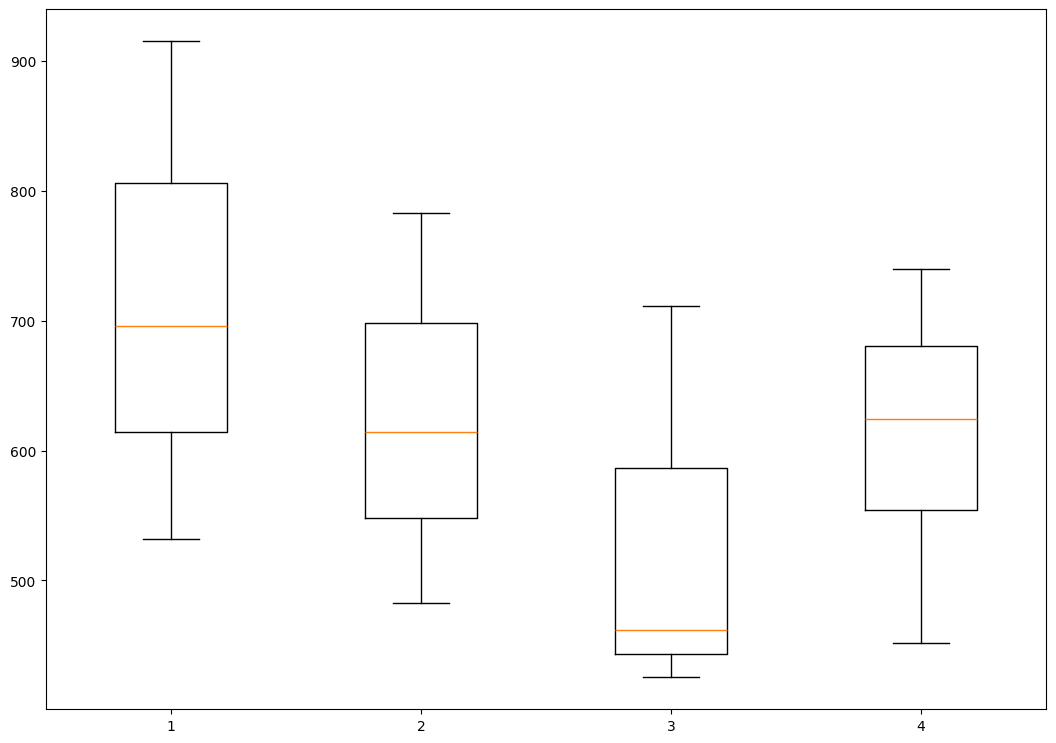

In [73]:
data_healthy = data_healthy["Intensity"]
data_VEDOSS =data_VEDOSS["Intensity"]
data_SSClow = data_SSClow["Intensity"]
data_SSChigh = data_SSChigh["Intensity"]
data = [data_healthy, data_VEDOSS, data_SSClow, data_SSChigh]
fig = plt.figure(figsize =(10, 7))

ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()


In [75]:
#     # Create scatter plot
#     plt.figure(figsize=(10, 8))
#     sns.scatterplot(
#         x=mrss, y=intensity_log, hue=condition, s=100, palette=custom_palette, edgecolor="black"
#     )

#     # Add color-coded annotations for each point
#     for i in range(len(merged_data)):
#         plt.text(
#             mrss.iloc[i],
#             intensity_log.iloc[i],
#             condition.iloc[i],  # Text is the condition
#             fontsize=10,
#             ha="center",
#             bbox=dict(
#                 boxstyle="round,pad=0.3",
#                 edgecolor="black",
#                 facecolor=custom_palette[condition.iloc[i]],  # Custom color for tag
#                 alpha=0.7
#             ),
#         )

#     # Set title and labels
#     plt.title(f"Correlation Plot for {protein_name}", fontsize=16)
#     plt.xlabel("MRSS (Linear Scale)", fontsize=12)
#     plt.ylabel("Intensity (Logarithmic Scale)", fontsize=12)
#     plt.grid(visible=True, linestyle="--", alpha=0.6)
#     plt.legend(title="Condition", loc="best")
#     plt.tight_layout()

#     return plt



# Creating dataset

In [76]:
# # Load necessary libraries
# library(ggplot2)

# # Define the colors for the boxplot
# mat_colors <- c('turquoise2', 'red')

# # Filter data for the specific protein of interest
# SCUBE3 <- subset_proteins_plot %>%
#   subset(SeqId == "16773-29") %>%  # Select the specific protein
#   ggplot(aes(Lung_Fibrosis, Intensity, label = SampleId)) +  # Map variables to axes
#   facet_wrap(~ EntrezGeneSymbol) +  # Facet by protein name (optional)
#   scale_y_log10() +  # Apply log10 scale to y-axis
#   geom_boxplot(fill = mat_colors) +  # Create boxplot with specified colors
#   theme_bw() +  # Apply a clean theme
#   theme(legend.position = "top") +  # Adjust legend position
#   labs(color = "Sample", x = "Lung Fibrosis")  # Add axis labels
# SCUBE3
